# GIN
GIN Benchmark
* GINGraph for graph classifcation (2+ graph datasets)
* GINNode for node classifcation (1 graph datasets)

#### Set up

In [ ]:
import sys
import os
import random

# Add the absolute path to the src directory 
os.chdir('../src')
src_path = os.path.abspath('../src/')
sys.path.insert(0, src_path)

from setup import *

In [2]:
# import 3 datasets
imdb_dataset, cora_dataset, enzyme_dataset = load_data()

# global variables
EPOCHS = 500 # number of epochs to run while training

## Node classifcation: CORA

In [3]:
# init model
cora_mdl = GINNode(in_channels = cora_dataset.num_features,
               hidden_channels = 30,
               out_channels = cora_dataset.num_classes,
               num_layers = 4)
optimizer = torch.optim.Adam(cora_mdl.parameters(), lr=0.01)

# train model
for epoch in range(EPOCHS):
    cora_mdl = node_train(model = cora_mdl, 
                                 data = cora_dataset, 
                                 optimizer=optimizer)

# evaluation
test_acc, train_acc, pred = node_test(cora_mdl, cora_dataset)
print(f'CORA GIN Test Accuracy: {test_acc:.4f}')
print(f'CORA GIN Train Accuracy: {train_acc:.4f}')

CORA GIN Test Accuracy: 0.7020
CORA GIN Train Accuracy: 1.0000


Graph, using predicted class node color. 

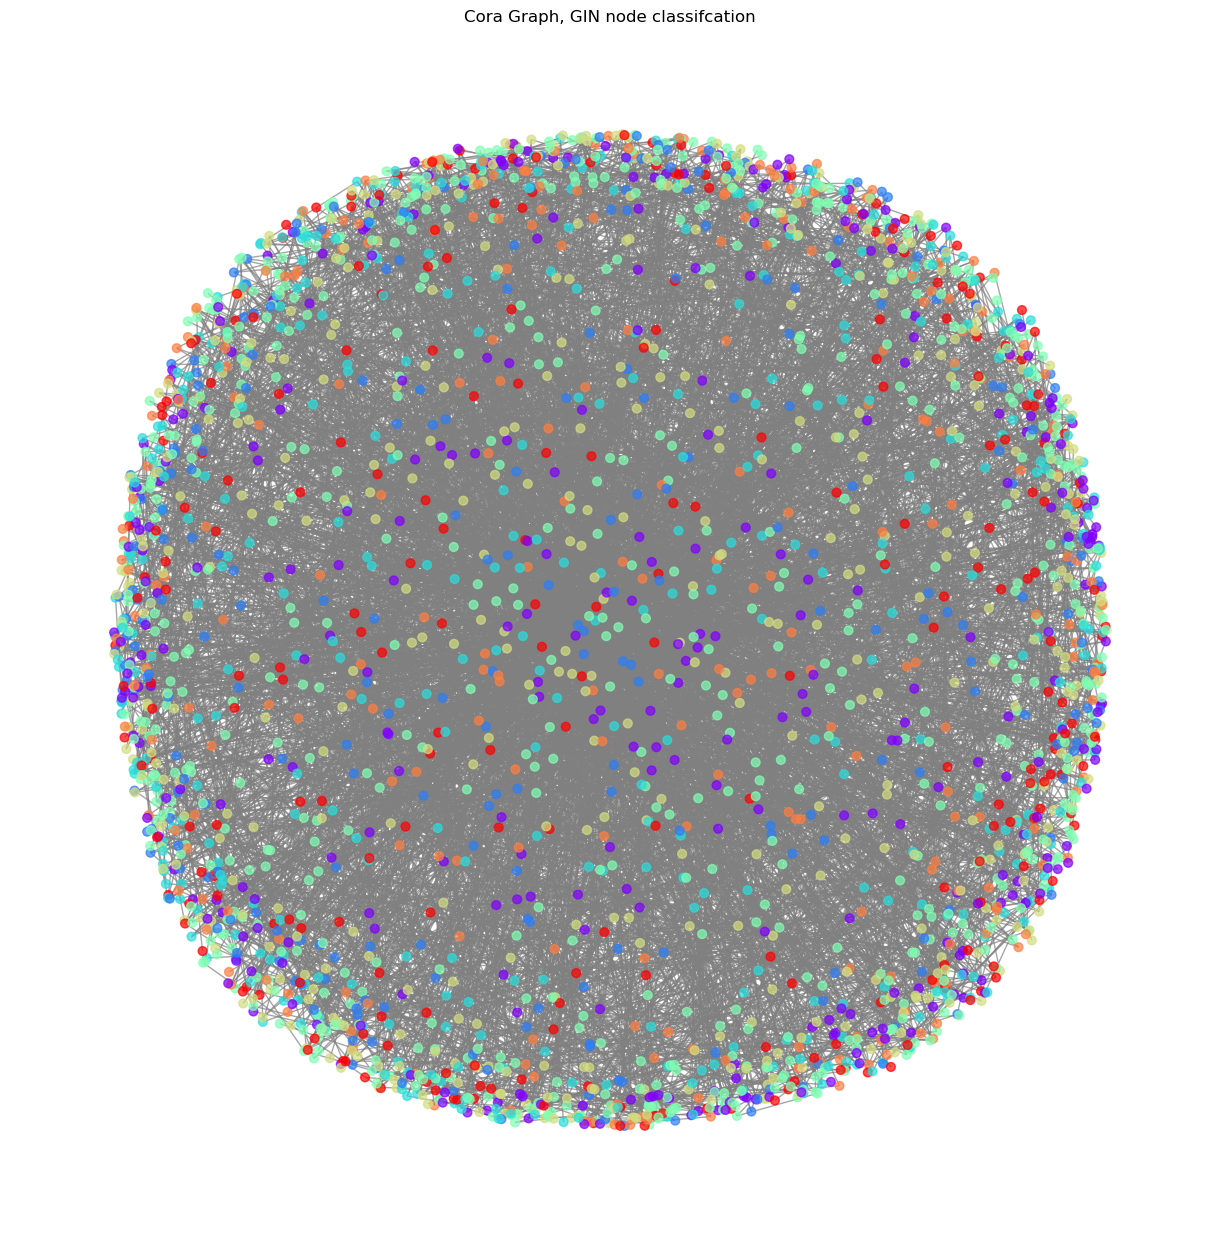

In [4]:
# graphing #
node_color = pred.cpu().numpy()
data = cora_dataset[0]
G = visualize_by_pred_class(pred, data, 
                                         title="Cora Graph, GIN node classifcation")

## Graph classifcation: IMDB

In [5]:
# split imdb data to train/test loaders
train_loader, test_loader = preprocess_data(imdb_dataset, 
                                                         onehot=True, 
                                                         batch_size=64)

In [6]:
# init model
imdb_model = GINGraph(in_channels=imdb_dataset.num_node_features,
                 hidden_channels=32, 
                 out_channels=imdb_dataset.num_classes,
                 num_layers = 4)
optimizer = torch.optim.Adam(imdb_model.parameters(), 
                             lr=0.01)

# Training the model
for epoch in range(EPOCHS): 
    train_loss = graph_train(imdb_model, train_loader, optimizer)
# evaluate
test_acc, train_acc = graph_test(imdb_model, test_loader, train_loader)
print(f"Final TEST Accuracy on IMDB_BINARY: {test_acc:.4f}")
print(f"Final TRAIN Accuracy on IMDB_BINARY: {train_acc:.4f}")

Final TEST Accuracy on IMDB_BINARY: 0.6700
Final TRAIN Accuracy on IMDB_BINARY: 0.8788


## Graph classification: ENZYME

In [7]:
# set up dataset
train_loader, test_loader = preprocess_data(enzyme_dataset, 
                                                         onehot=False, 
                                                         batch_size=64)

In [8]:
# init model
enzyme_mdl = GINGraph(enzyme_dataset.num_features,
                          80,
                          enzyme_dataset.num_classes,
                          num_layers=4)
#enzyme_mdl = torch.jit.script(enzyme_mdl)
optimizer = torch.optim.Adam(enzyme_mdl.parameters(),
                             lr=0.001,
                             weight_decay=1e-5)

# train model
for epoch in range(EPOCHS):
    loss = graph_train(enzyme_mdl, train_loader, optimizer)

# evaluate on test data
test_acc, train_acc = graph_test(enzyme_mdl, test_loader, train_loader)
print(f"Final TEST Accuracy on ENZYME: {test_acc:.4f}")
print(f"Final TRAIN Accuracy on ENZYME: {train_acc:.4f}")

Final TEST Accuracy on ENZYME: 0.5333
Final TRAIN Accuracy on ENZYME: 1.0000
